# Logistic Regression Project

This is a model that will predict whether a team will be able to finish top 4 in the premier league or not with a given number of points, based on sample data of previous 5 seasons.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [89]:
# Sample data collected manually, X= number of points, Y= top 4 or not
X_train=np.array([92.,93.,74.,71.,69.,58.,69.,67.,66.,65.,81.,66.,62.,59.,72.,71.,70.,66.,77.,75.,70.,63.,54.,76.,75.,69.,61.,54.,56.,62.])
Y_train=np.array([1.,1.,1.,1.,0.,0.,1.,1.,0.,0.,1.,1.,0.,0.,1.,1.,0.,0.,1.,1.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.])

print(X_train)
print(Y_train)

[0.092 0.093 0.074 0.071 0.069 0.058 0.069 0.067 0.066 0.065 0.081 0.066
 0.062 0.059 0.072 0.071 0.07  0.066 0.077 0.075 0.07  0.063 0.054 0.076
 0.075 0.069 0.061 0.054 0.056 0.062]
[1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0.]


In [80]:
# Checking the dimension of data
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(Y_train.shape))
print ('We have m = %d training examples' % (len(Y_train)))

The shape of X_train is: (30,)
The shape of y_train is: (30,)
We have m = 30 training examples


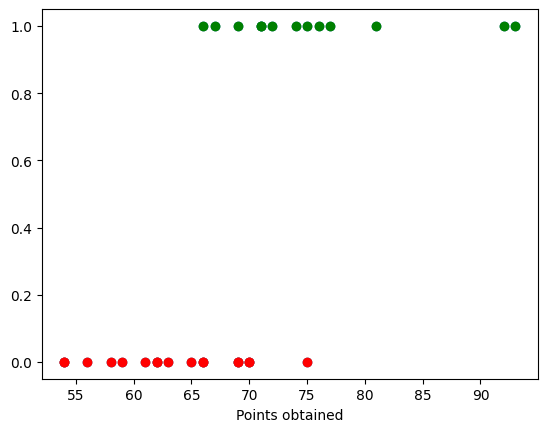

In [47]:
#Plotting the data
plt.scatter(X_train,Y_train)
plt.xlabel("Points obtained")

m =X_train.shape[0]
col =[]
  
for i in range(0, len(Y_train)):
    if Y_train[i]==1:
        col.append('green')  
    else:
        col.append('red') 
  
for i in range(m):
      
    # plotting the corresponding x with y 
    # and respective color
    plt.scatter(X_train[i], Y_train[i], c = col[i])
    
#plt.legend(["Didn't finish top 4", "Finished top 4"], loc ="center right",labelcolor=["red","green"])

plt.show()


### Sigmoid function

In [81]:
def sigmoid(z):
    
    g = 1/(1+np.exp(-z))
    return g
    

### Cost function for logistic regression

In [95]:

def compute_cost(X,y,w,b):
    
    m = X.shape[0]
    total_loss=0
    epsilon = 1e-7
    for i in range(m):
        
        z_wb= w*X[i]+b  
        f_wb=sigmoid(z_wb)
        #print(f_wb)
        loss =  -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb+epsilon)
        total_loss=total_loss+loss
        
    total_cost = (1 / m) * total_loss
    
    ### END CODE HERE ### 

    return total_cost

In [109]:
m=X_train.shape[0]

# Compute and display cost with w initialized to zeroes
initial_w = 0.
initial_b = 10
cost = compute_cost(X_train, Y_train, initial_w, initial_b)
print(f"Cost at w=0 is {cost}")

Cost at w=1 is 5.665465215248766


### Gradient function

In [113]:
def compute_gradient(X, y, w, b): 

    m=X.shape[0]
    dj_dw = 0.
    dj_db = 0.


    for i in range(m):
       
        z_wb= w*X[i]+b  
        f_wb=sigmoid(z_wb)
        
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        
        dj_dw_i = (f_wb - y[i])* X[i]
        dj_dw += dj_dw_i
            
    dj_dw = dj_dw/m
    dj_db = dj_db/m


        
    return dj_db, dj_dw

In [118]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0.
initial_b = 1.

dj_db, dj_dw = compute_gradient(X_train, Y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw}' )

dj_db at initial w (zeros):0.2977252452966716
dj_dw at initial w (zeros):17.47246159045667


### Learning parameters using gradient descent

In [121]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    
   
    # number of training examples
    m = X.shape[0]
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [130]:

intial_w = 1.
initial_b = 5.


# Some gradient descent settings
iterations = 20000
alpha = 0.0001

w,b, J_history,_ = gradient_descent(X_train ,Y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations)

Iteration    0: Cost     2.71   
Iteration 2000: Cost     0.96   
Iteration 4000: Cost     0.96   
Iteration 6000: Cost     0.96   
Iteration 8000: Cost     0.96   
Iteration 10000: Cost     0.96   
Iteration 12000: Cost     0.96   
Iteration 14000: Cost     0.96   
Iteration 16000: Cost     0.96   
Iteration 18000: Cost     0.96   
Iteration 19999: Cost     0.96   


## PREDICTION

In [149]:

points= int(input("Enter the number of points: "))
result = sigmoid(w*points+b)
if(result<0.5):
    print("The team is expected to finish top 4 and qualify for the champions league")
else:
    print("The team is not expected to finish top 4.")

Enter the number of points: 69
The team is expected to finish top 4 and qualify for the champions league
